In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
%matplotlib inline


In [ ]:
BASE_DIR = "."
BASE_COLOR = sns.color_palette()[0]
RANDOM_STATE = 42
TEST_SIZE = 0.2


In [ ]:
anemia_df = pd.read_csv(os.path.join(BASE_DIR, "anemia.csv"))
anemia_df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [ ]:
anemia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [ ]:
## check if there is any NaN values
anemia_df.isna().sum()

In [ ]:
## check the dtypes of the columns in the dataframe
anemia_df.dtypes

Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object

In [ ]:
anemia_df.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result'], dtype='object')

**DATA EXPLORATION**

In [ ]:
## Counts proportion of the gender column
print("Counts: ")
print(anemia_df["Gender"].value_counts())
print("\nProportions: ")
print(anemia_df["Gender"].value_counts(normalize=True))

Counts: 
1    740
0    681
Name: Gender, dtype: int64

Proportions: 
1    0.52076
0    0.47924
Name: Gender, dtype: float64


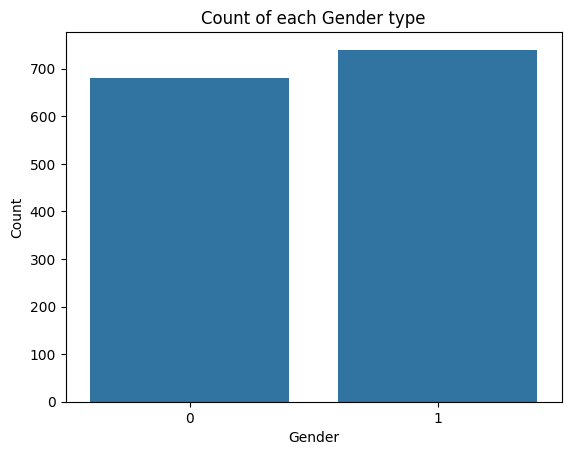

In [ ]:
ax = sns.countplot(x="Gender", data=anemia_df, color=BASE_COLOR)
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Count of each Gender type");


In [ ]:
## Dist. of the Hemoglobin column
(
anemia_df[["Hemoglobin", 'MCH', 'MCHC', 'MCV']]
.describe().transpose().round(3)
)


,count,mean,std,min,25%,50%,75%,max
Hemoglobin,1421.0,13.413,1.975,6.6,11.7,13.2,15.0,16.9
MCH,1421.0,22.906,3.969,16.0,19.4,22.7,26.2,30.0
MCHC,1421.0,30.251,1.401,27.8,29.0,30.4,31.4,32.5
MCV,1421.0,85.524,9.637,69.4,77.3,85.3,94.2,101.6


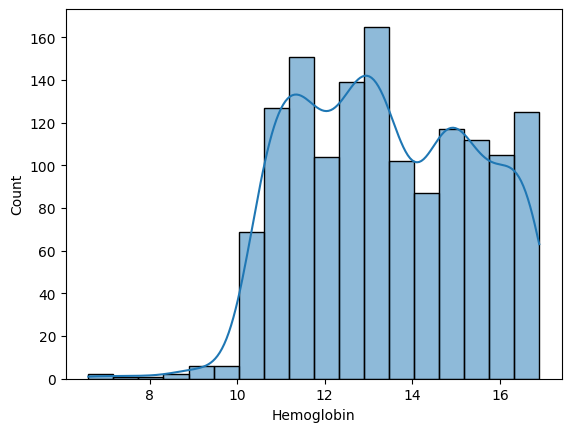

In [ ]:
sns.histplot(x="Hemoglobin", data=anemia_df, kde=True);


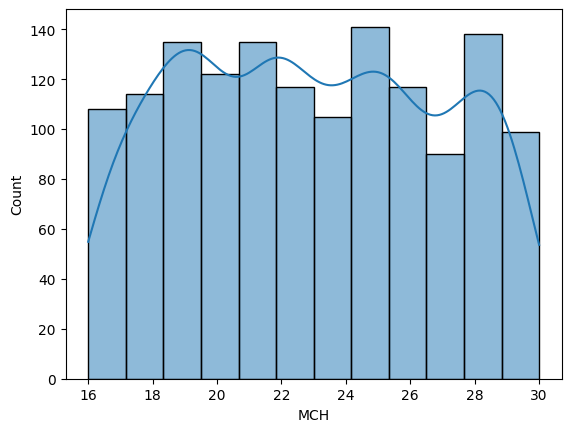

In [ ]:
## Dist. of 'MCH', 'MCHC', 'MCV' columns
sns.histplot(x="MCH", data=anemia_df, kde=True);

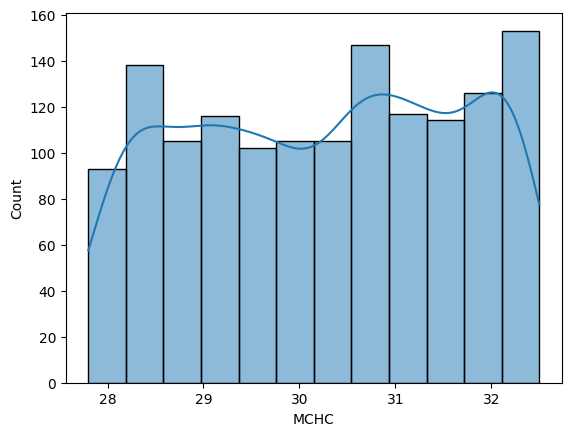

In [ ]:
sns.histplot(x="MCHC", data=anemia_df, kde=True);


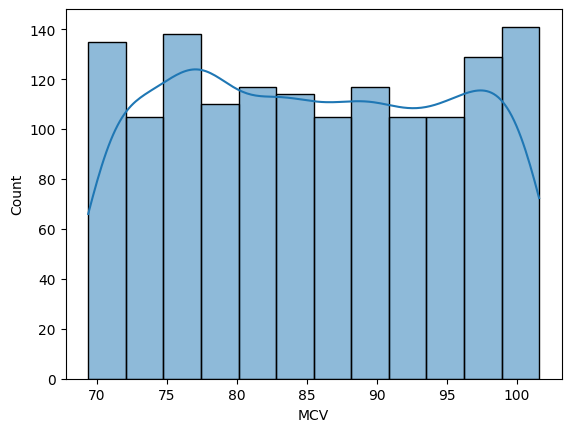

In [ ]:
sns.histplot(x="MCV", data=anemia_df, kde=True);

In [ ]:
 ## Counts and proportion of the Result column
print("Counts: ")
print(anemia_df["Result"].value_counts())
print("\nProportions: ")
print(anemia_df["Result"].value_counts(normalize=True))


Counts: 
0    801
1    620
Name: Result, dtype: int64

Proportions: 
0    0.563688
1    0.436312
Name: Result, dtype: float64


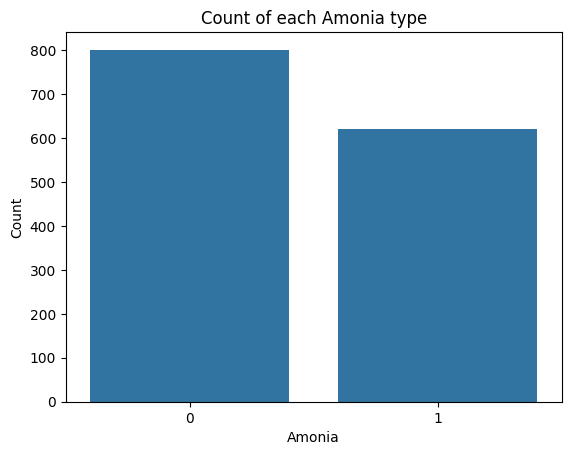

In [ ]:
ax = sns.countplot(x="Result", data=anemia_df, color=BASE_COLOR)
ax.set_xlabel("Amonia")
ax.set_ylabel("Count")
ax.set_title("Count of each Amonia type");


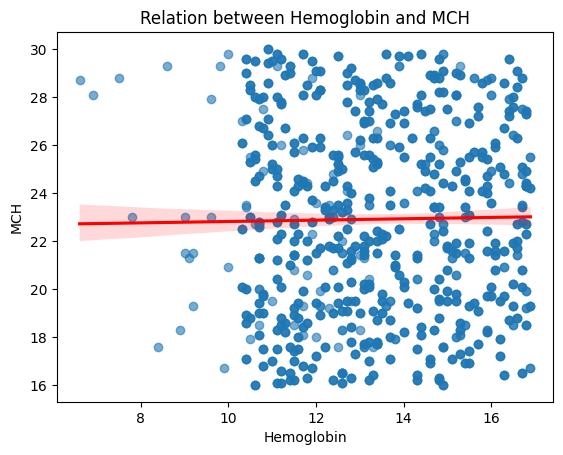

In [ ]:
 ## Relation between Hemoglobin and MCH
ax = sns.regplot(x="Hemoglobin", y="MCH", data=anemia_df,
scatter_kws={"alpha": 0.6}, line_kws={"color": "red"});
ax.set_title("Relation between Hemoglobin and MCH");

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

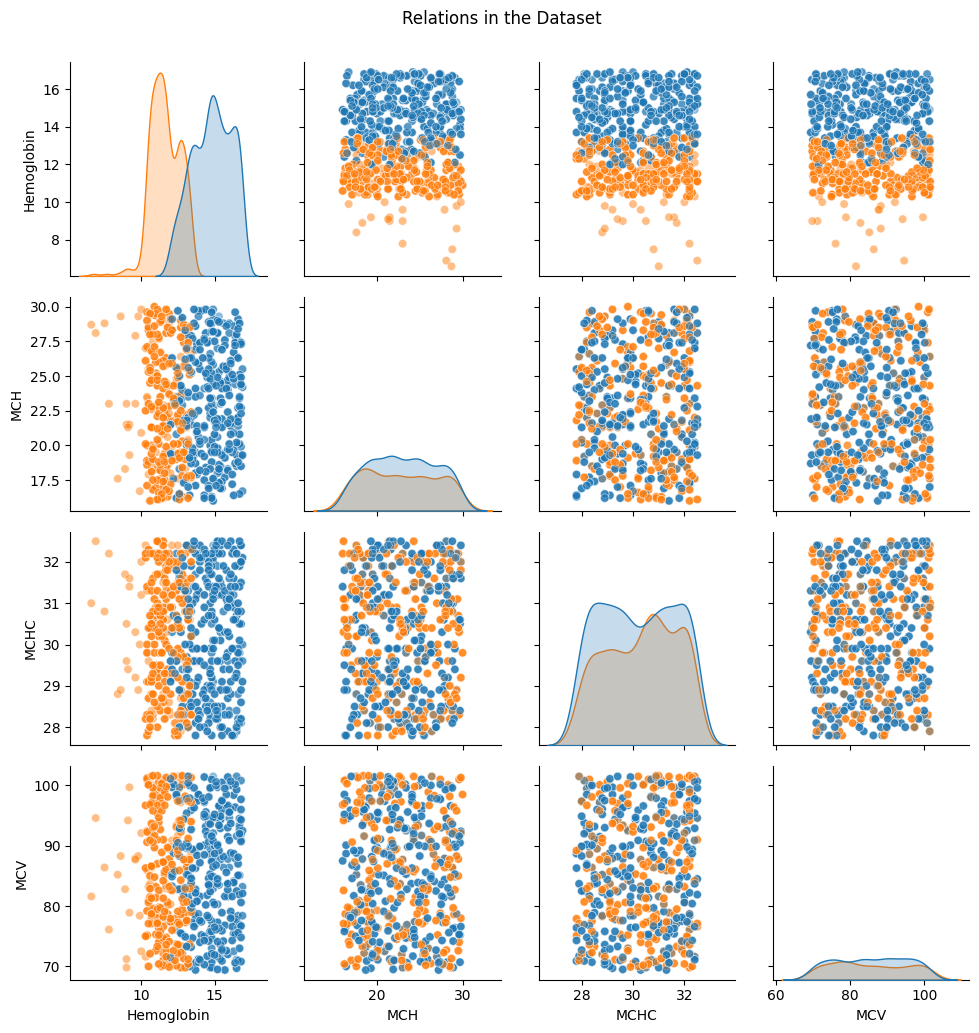

In [ ]:
RELATIONS_COLS = ["Hemoglobin", "MCH", "MCHC", "MCV"]
g = sns.PairGrid(data=anemia_df, vars=RELATIONS_COLS, hue="Result")
g.map_diag(sns.kdeplot, shade=True)
g.map_offdiag(sns.scatterplot, alpha=0.5);
g.fig.suptitle("Relations in the Dataset", y=1.03);


<Axes: >

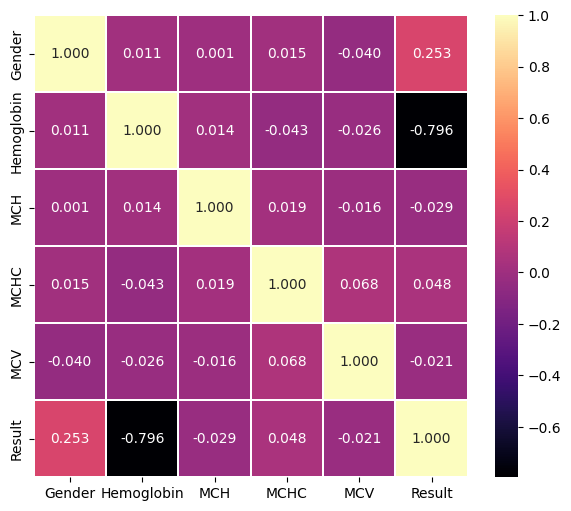

In [ ]:
corr = anemia_df.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(corr, cmap="magma", annot=True, fmt="0.3f", linewidths=0.1)


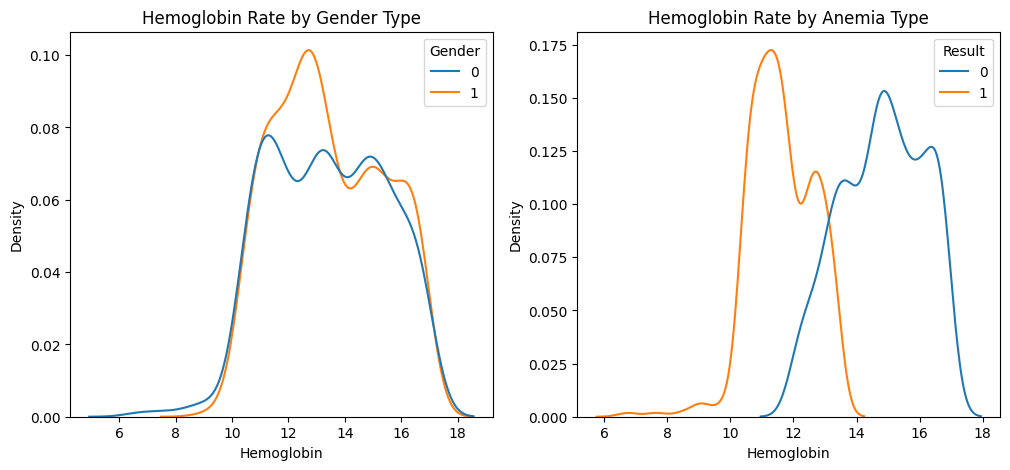

In [ ]:
 ## Dist. of Hemoglobin by Anemia Type
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
sns.kdeplot(x="Hemoglobin", data=anemia_df, hue="Gender", ax=ax1);
ax1.set_title("Hemoglobin Rate by Gender Type");
sns.kdeplot(x="Hemoglobin", data=anemia_df, hue="Result", ax=ax2);
ax2.set_title("Hemoglobin Rate by Anemia Type");


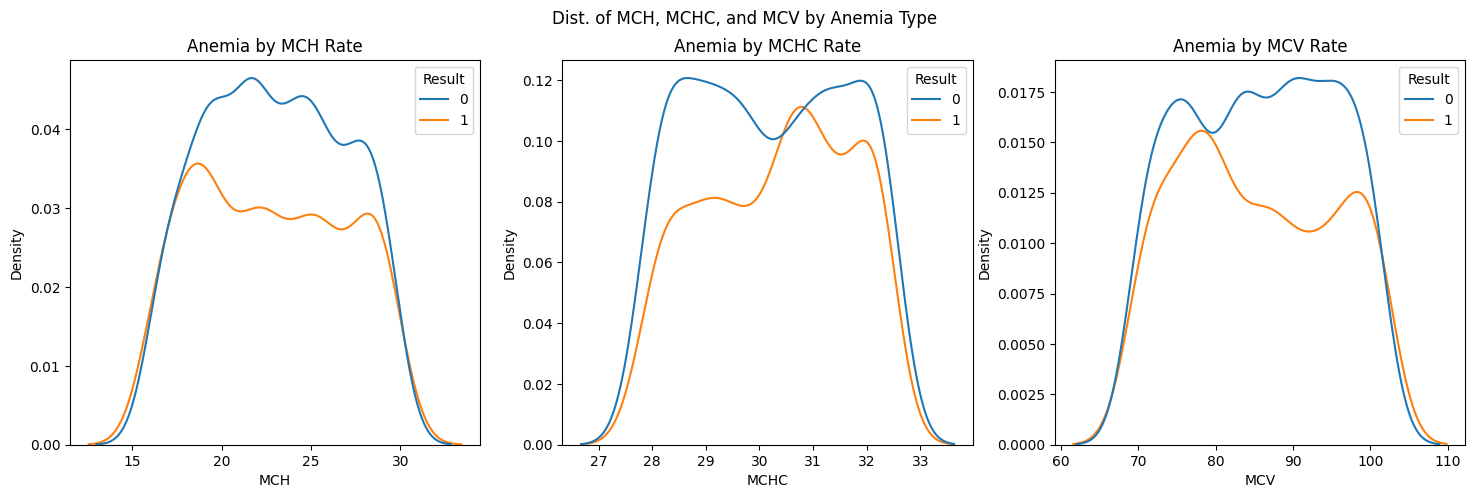

In [ ]:
## Dist. of MCH, MCHC, MCV by Anemia Type
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 5))
sns.kdeplot(x="MCH", data=anemia_df, hue="Result", ax=ax1);
ax1.set_title("Anemia by MCH Rate");
sns.kdeplot(x="MCHC", data=anemia_df, hue="Result", ax=ax2);
ax2.set_title("Anemia by MCHC Rate");
sns.kdeplot(x="MCV", data=anemia_df, hue="Result", ax=ax3);
ax3.set_title("Anemia by MCV Rate");
fig.suptitle("Dist. of MCH, MCHC, and MCV by Anemia Type");


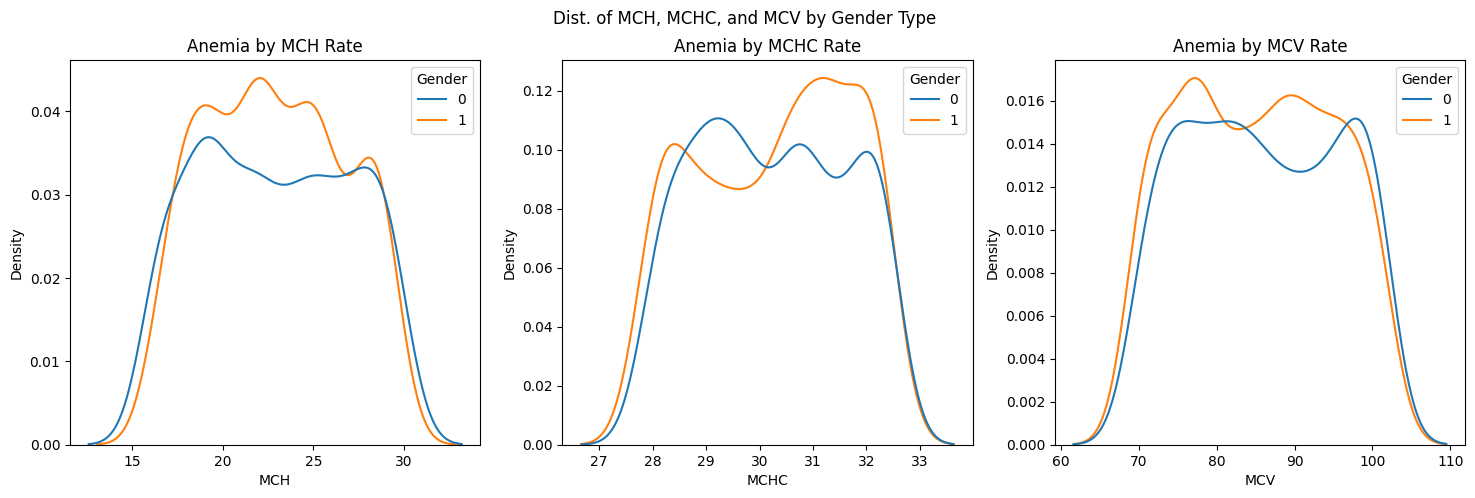

In [ ]:
## Dist. of MCH, MCHC, MCV by Gender Type
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 5))
11
sns.kdeplot(x="MCH", data=anemia_df, hue="Gender", ax=ax1);
ax1.set_title("Anemia by MCH Rate");
sns.kdeplot(x="MCHC", data=anemia_df, hue="Gender", ax=ax2);
ax2.set_title("Anemia by MCHC Rate");
sns.kdeplot(x="MCV", data=anemia_df, hue="Gender", ax=ax3);
ax3.set_title("Anemia by MCV Rate");
fig.suptitle("Dist. of MCH, MCHC, and MCV by Gender Type");


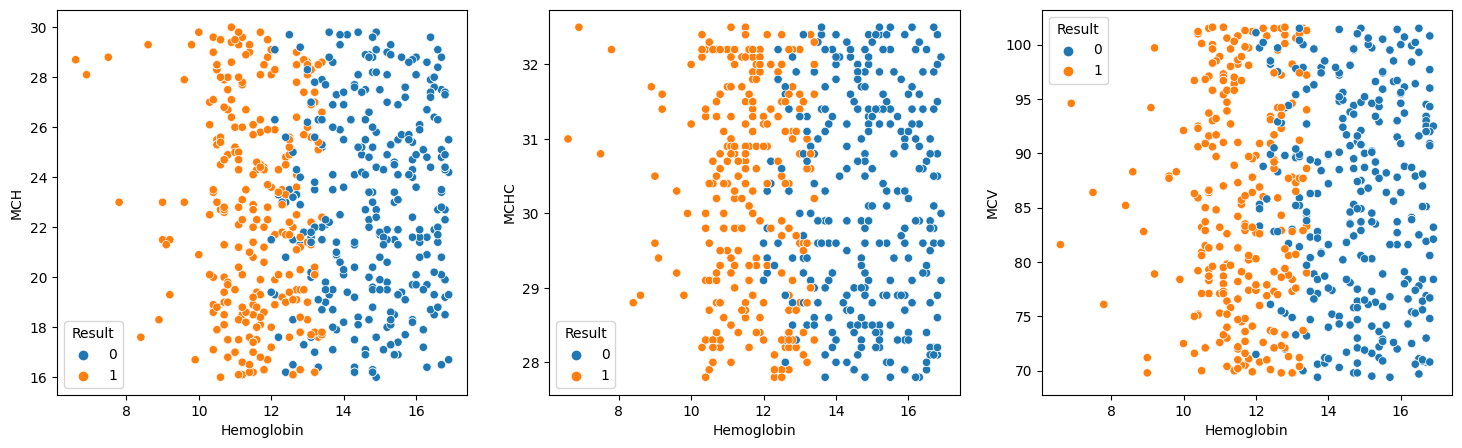

In [ ]:
 ## Relation between Hemoglobin and MCH by Anemia Type
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 5))
sns.scatterplot(x="Hemoglobin", y="MCH", data=anemia_df, hue="Result", ax=ax1);
sns.scatterplot(x="Hemoglobin", y="MCHC", data=anemia_df, hue="Result", ax=ax2);
sns.scatterplot(x="Hemoglobin", y="MCV", data=anemia_df, hue="Result", ax=ax3);

In [ ]:
## Hemoglobin Values by Anemia Result
(
anemia_df.groupby("Result")["Hemoglobin"]
.agg([np.mean, "min", "max", np.std])
)


,mean,min,max,std
Result,,,,
0,14.795506,12.0,16.9,1.318837
1,11.626290,6.6,13.4,1.012572


In [ ]:
## MCH, MCHC, MCV Values by Gender Type
anemia_df.groupby("Gender")[["MCH", "MCHC", "MCV"]].agg(np.mean)


,MCH,MCHC,MCV
Gender,,,
0,22.901322,30.229956,85.929956
1,22.909595,30.270811,85.150000


Comments: The data does not contain any NaN values. -Columns have correct data types.

Data Exploration 1. Gender - Gender have a balanced values with a litte bias twards the Male

Type. 2. Hemoglobin - Follow Uniform Distrebuiotn with some diviation. 3. MCH, MCHC,
and MCV - Follow nealy a perfect Uniform Distrebution.

**Relations**

The only thing that stands out of these plots above are the Relation between Anemia Result and
the Hemoglobin Value as shown the Patient that dignosted with Anemia have Hemoglobin Values
less the those that Don’t.

##2.  **Data Transformation**

In [ ]:
targets = anemia_df["Result"]
features = anemia_df.drop("Result", axis=1)
features.head()


,Gender,Hemoglobin,MCH,MCHC,MCV
0,1,14.9,22.7,29.1,83.7
1,0,15.9,25.4,28.3,72.0
2,0,9.0,21.5,29.6,71.2
3,0,14.9,16.0,31.4,87.5
4,1,14.7,22.0,28.2,99.5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, targets,
test_size=TEST_SIZE, random_state=RANDOM_STATE)
X_train = pd.DataFrame(X_train, columns=features.columns)
X_test = pd.DataFrame(X_test, columns=features.columns)
assert X_train.shape[1] == X_test.shape[1]

##**2.1 Data Balancing (Anemia)**

In [ ]:
##to install imblearn use : $ pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=RANDOM_STATE)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
print("Training Set Size : ")
print(X_train.shape)
print("\nTesting Set Size : ")
print(X_test.shape)

Training Set Size : 
(1288, 5)

Testing Set Size : 
(285, 5)


In [ ]:
SCALING_COLS = ["Hemoglobin", "MCH", "MCHC", "MCV"]


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[SCALING_COLS])
X_train_scaled = pd.DataFrame(scaler.transform(X_train[SCALING_COLS]), columns=SCALING_COLS)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[SCALING_COLS]),columns=SCALING_COLS)
X_train_scaled["Gender"] = X_train["Gender"].values
X_test_scaled["Gender"] = X_test["Gender"].values
assert X_train_scaled.shape[1] == X_test_scaled.shape[1]
print(X_train_scaled.head())
print("\n===================================================\n")
print(X_test_scaled.head())

   Hemoglobin       MCH      MCHC       MCV  Gender
0   -0.253376  0.108962  0.032342  0.745269       0
1   -1.425038 -0.996668 -1.788424 -1.082634       1
2    0.918286 -0.519237  1.488955  0.321856       1
3    1.223937  1.491000  0.396495  0.084332       0
4   -1.374096  0.033578  0.105173  1.499149       1


   Hemoglobin       MCH      MCHC       MCV  Gender
0   -0.253376 -0.946412 -0.331811 -0.132538       1
1    0.816402  1.340232  0.396495 -1.537028       0
2    0.154159  1.214592  0.542157 -0.855437       1
3    1.376762 -0.795644  0.469326  1.633402       0
4   -2.036340 -0.343341  0.979141  1.457841       0


In [ ]:
assert X_train_scaled.isna().sum().sum() == 0
assert X_test_scaled.isna().sum().sum() == 0

##**3 Data Modeling**

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train_scaled, y_train)
y_pred = dt_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       128

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)
y_pred = rf_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       128

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



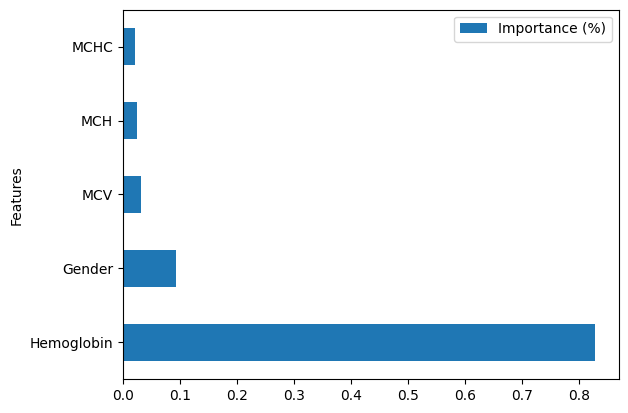

In [ ]:
importance = (pd.DataFrame([rf_clf.feature_importances_],
columns=X_train_scaled.columns)
.transpose().reset_index().sort_values(0, ascending=False)
)
importance.columns = ["Features", "Importance (%)"]
importance.plot(kind="barh", x="Features", y="Importance (%)");

In [ ]:
lg_clf = LogisticRegression()
lg_clf.fit(X_train_scaled, y_train)
y_pred = lg_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       157
           1       0.96      1.00      0.98       128

    accuracy                           0.98       285
   macro avg       0.98      0.98      0.98       285
weighted avg       0.98      0.98      0.98       285



In [ ]:
lg_clf.coef_


array([[-7.4089963 , -0.02563176,  0.15197839, -0.14559949,  5.15315865]])

##**4 Making Pipeline (Production)**

In [ ]:
X_train.head()

,Gender,Hemoglobin,MCH,MCHC,MCV
0,0,12.7,23.3,30.3,92.8
1,1,10.4,18.9,27.8,75.1
2,1,15.0,20.8,32.3,88.7
3,0,15.6,28.8,30.8,86.4
4,1,10.5,23.0,30.4,100.1


In [ ]:
dt_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("dt_clf", DecisionTreeClassifier())
])
dt_pipe.fit(X_train, y_train)
y_pred = dt_pipe.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       128

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



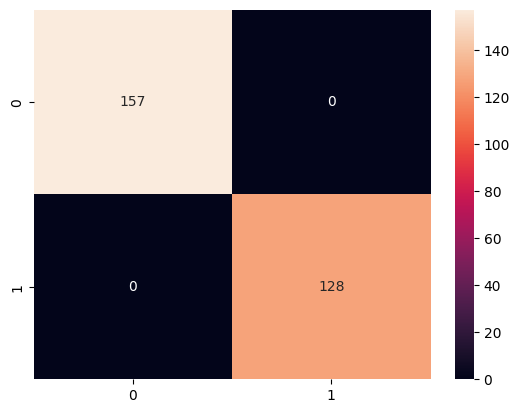

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d");


In [ ]:
X_train.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV'], dtype='object')

In [ ]:
sample = pd.DataFrame([[1, 13.7,33.3,50.3,92.8]], columns=X_train.columns)
print(dt_pipe.predict(sample))
print(dt_pipe.predict_proba(sample))


[0]
[[1. 0.]]


##**5. Saving Model (Pipeline)**


In [ ]:
import pickle
with open("anemia/models/DecisionTree_Pipeline.pkl", "wb") as f:
   pickle.dump(dt_pipe, f)